In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [331]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [333]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [334]:
# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I


--- Counts of Unique Values (Series) ---


Country                    225
Other names                224
ISO 3166-1 alpha-3 CODE    225
Population                 225
Continent                    6
Total Cases                224
Total Deaths               208
Tot Cases//1M pop          225
Tot Deaths/1M pop          200
Death percentage           218
dtype: int64

In [335]:
# drop karena lokasi cukup diwakili dengan country
df = df.drop(columns=['Other names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    object 
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Tot Cases//1M pop        225 non-null    int64  
 7   Tot Deaths/1M pop        225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 15.9+ KB


# Visualization

In [336]:
# Choropleth World Map (By Continent)
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    title="World Map by Continent",
    projection="natural earth",
)
fig.show()

Visualisasi peta dunia ini menunjukkan distribusi negara berdasarkan benua, di mana setiap benua diberi warna berbeda untuk mempermudah identifikasi pola geografis. Dari peta tersebut terlihat jelas bahwa negara-negara dalam satu kawasan geografis dikelompokkan dengan konsisten, sehingga membantu memahami persebaran lokasi negara yang ada dalam dataset. Selain itu, visualisasi ini memberikan konteks awal yang penting sebelum melakukan analisis lanjutan seperti perbandingan kasus atau kematian antar benua.

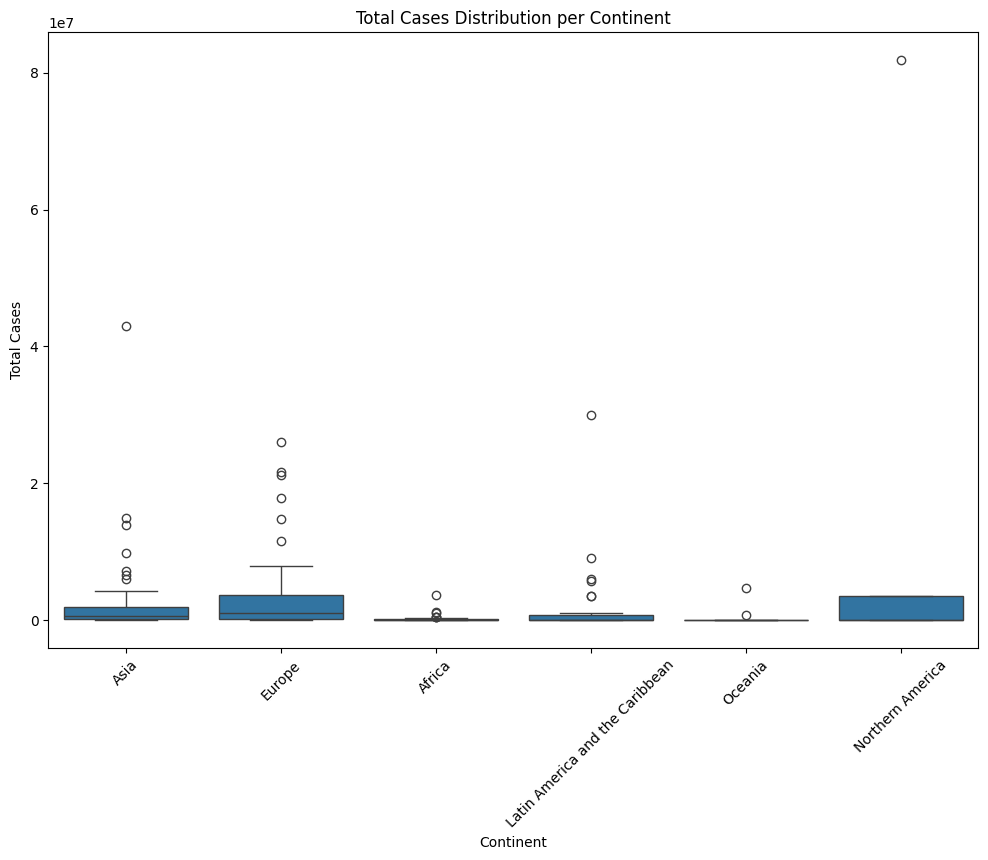

In [337]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Continent', y='Total Cases')
plt.title('Total Cases Distribution per Continent')
plt.xticks(rotation=45)
plt.show()

Boxplot ini menunjukkan bahwa distribusi Total Cases sangat bervariasi antar benua, dengan Asia, Eropa, dan Northern America memiliki jumlah kasus jauh lebih tinggi dibanding benua lain. Terlihat banyak outlier ekstrem pada ketiga benua tersebut, menandakan adanya negara dengan kasus sangat tinggi. Sementara itu, Africa, Oceania, dan Latin America memiliki sebaran kasus yang lebih rendah dan lebih homogen.

# Encoding

In [338]:
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Country', 'ISO 3166-1 alpha-3 CODE', 'Continent']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5},
 'Country': {'Afghanistan': 0,
             'Albania': 1,
             'Algeria': 2,
             'Andorra': 3,
             'Angola': 4,
             'Anguilla': 5,
             'Antigua and Barbuda': 6,
             'Argentina': 7,
             'Armenia': 8,
             'Aruba': 9,
             'Australia': 10,
             'Austria': 11,
             'Azerbaijan': 12,
             'Bahamas': 13,
             'Bahrain': 14,
             'Bangladesh': 15,
             'Barbados': 16,
             'Belarus': 17,
             'Belgium': 18,
             'Belize': 19,
             'Benin': 20,
             'Bermuda': 21,
             'Bhutan': 22,
             'Bolivia': 23,
             'Bosnia and Herzegovina': 24,
             'Botswana': 25,
             'Brazil': 26,
             'B

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
159,159.0,161.0,112133868,1.0,3679485,59343,32813,529,1.612807
92,92.0,95.0,1403754381,1.0,43029044,521388,30653,371,1.211712
67,67.0,67.0,3657,3.0,123,0,33634,0,0.000000
24,24.0,22.0,3245097,2.0,375693,15719,115773,4844,4.184001
176,176.0,173.0,35762746,1.0,751076,9048,21002,253,1.204672


# Data Transformation

In [339]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[[
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage']])

df_scaled = pd.DataFrame(df_scaled, columns=[
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage'])
df_scaled.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [340]:
# get stastical information on the new dataset
df_scaled.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-1.578984e-17,2.713879e-17,8.881784e-18,7.894919e-17,4.736952e-17,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,5.971815e-01,5.852909e-01,3.066382e-01
max,1.010746e+01,1.097204e+01,1.014493e+01,3.863153e+00,4.349575e+00,9.613966e+00


# Silhouette Score

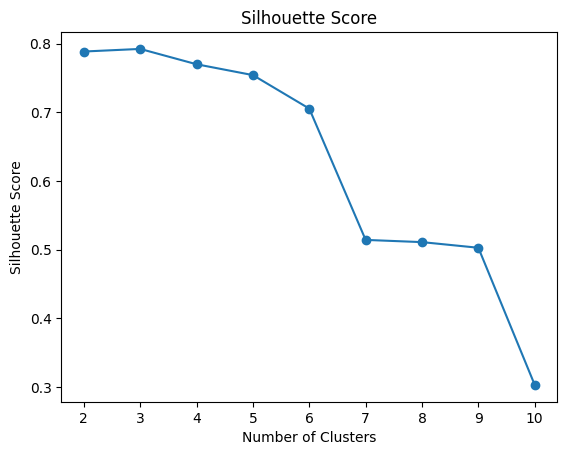

In [341]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


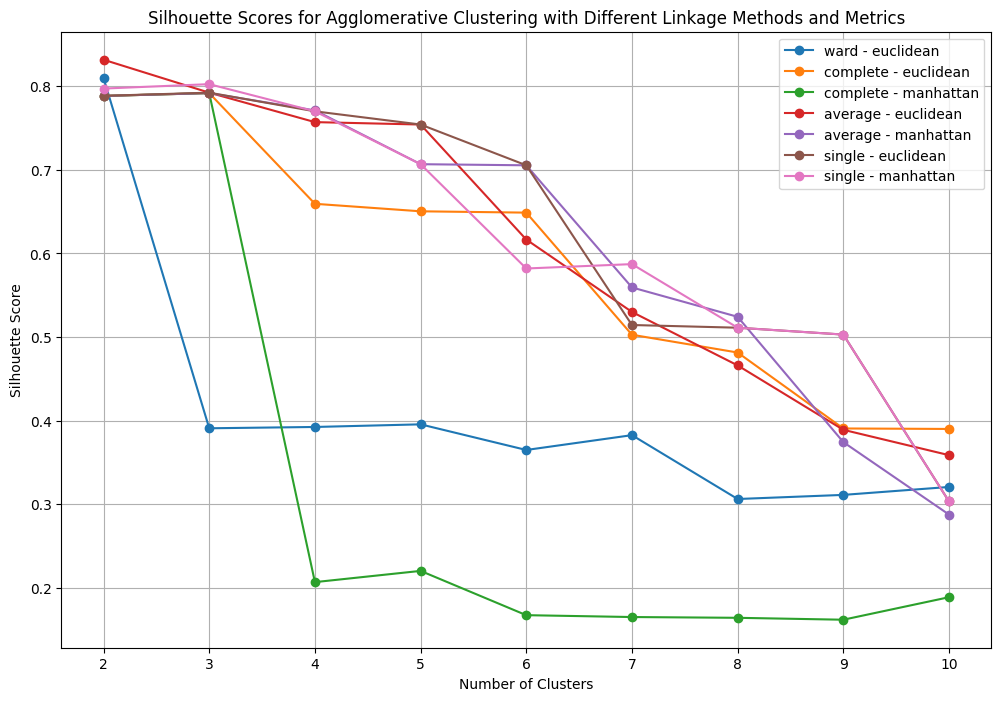

Best Silhouette Score: 0.8318263727111447
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [342]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# Dendogram Visualization

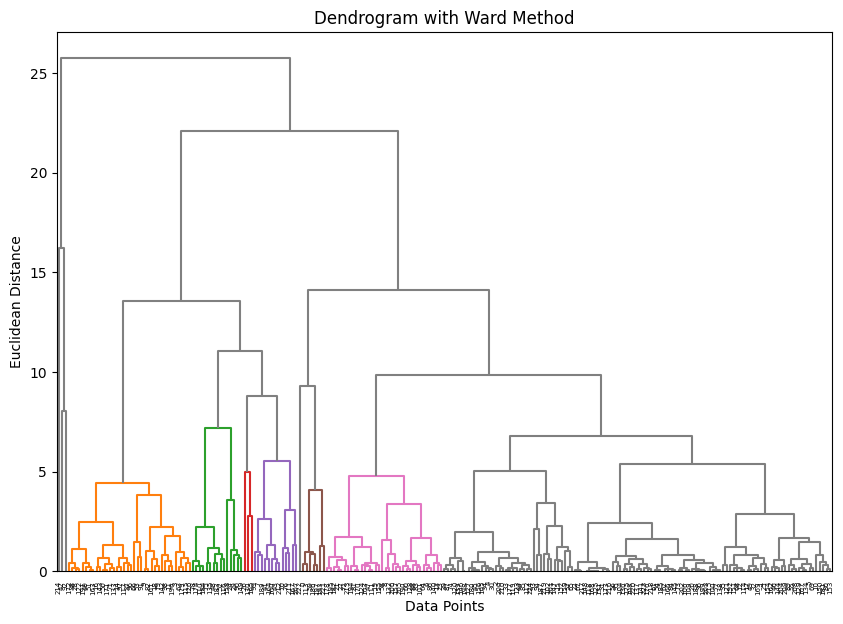

In [343]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

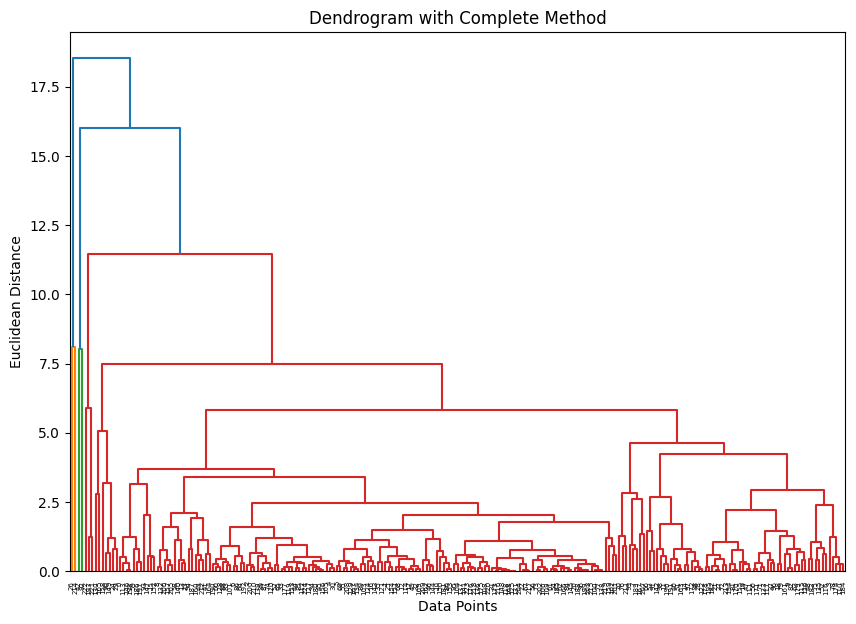

In [344]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

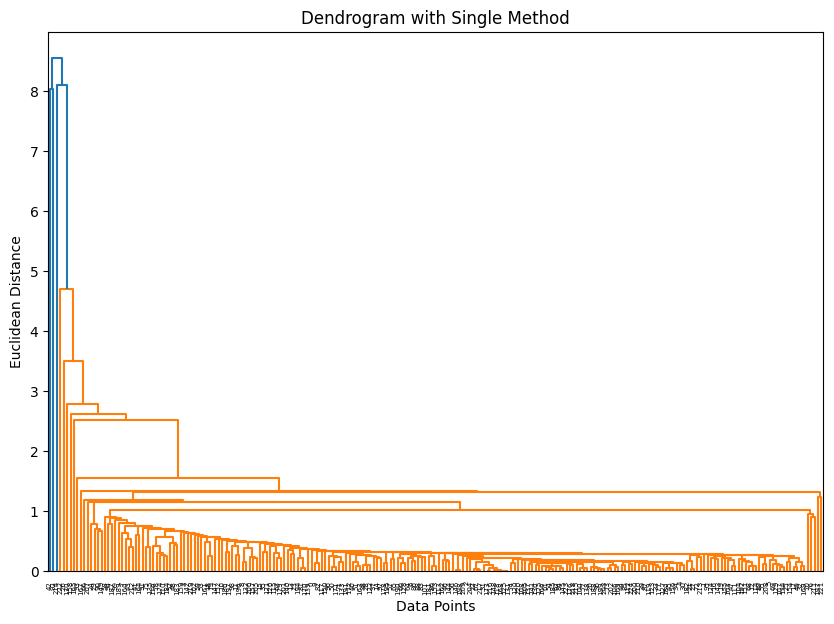

In [345]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

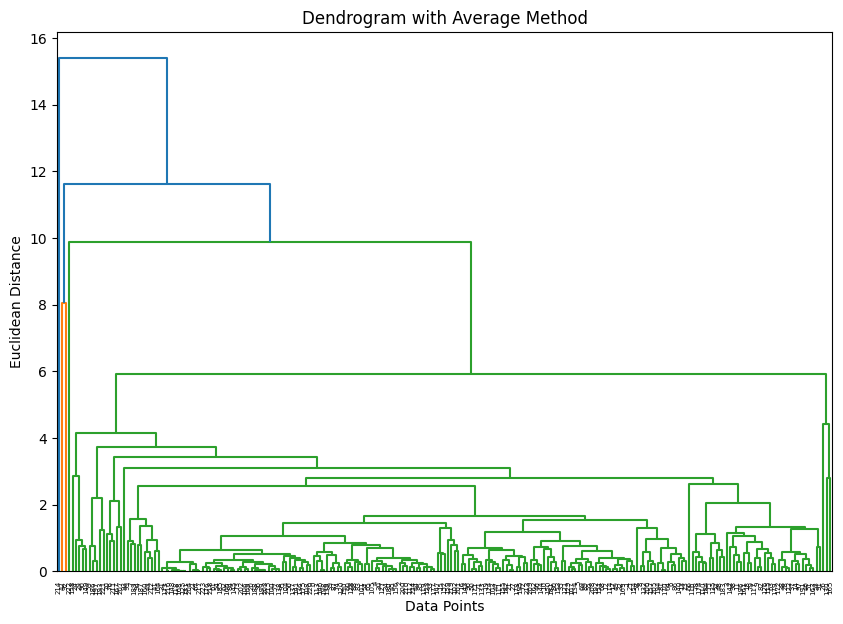

In [346]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Hierarchical Clustering Model

In [347]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [348]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.8318263727111447


## Dendogram Visualization for Hierarchical Clustering Model

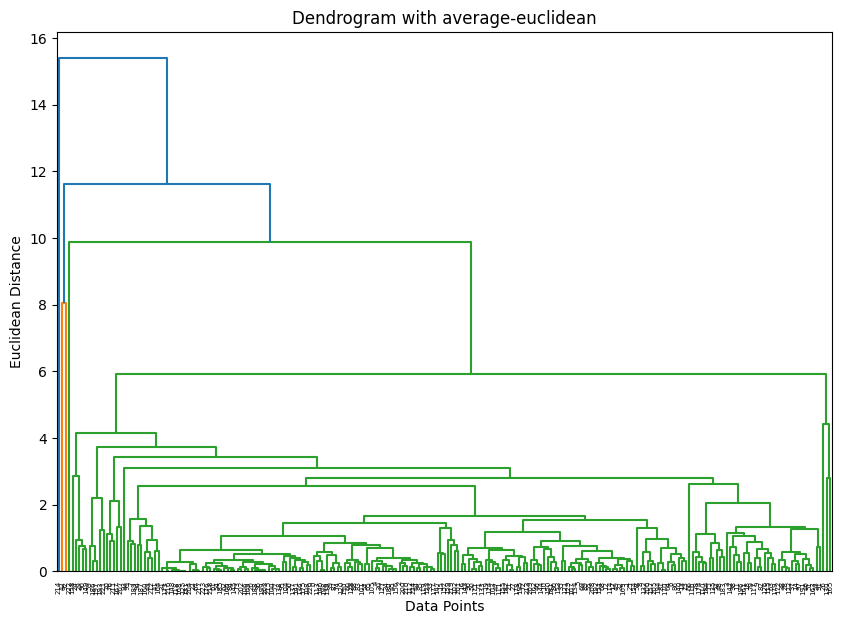

In [349]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Merge with the original data

In [350]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Agglo
0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743,0
1,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058,0
2,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216,0
3,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271,0
4,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438,0


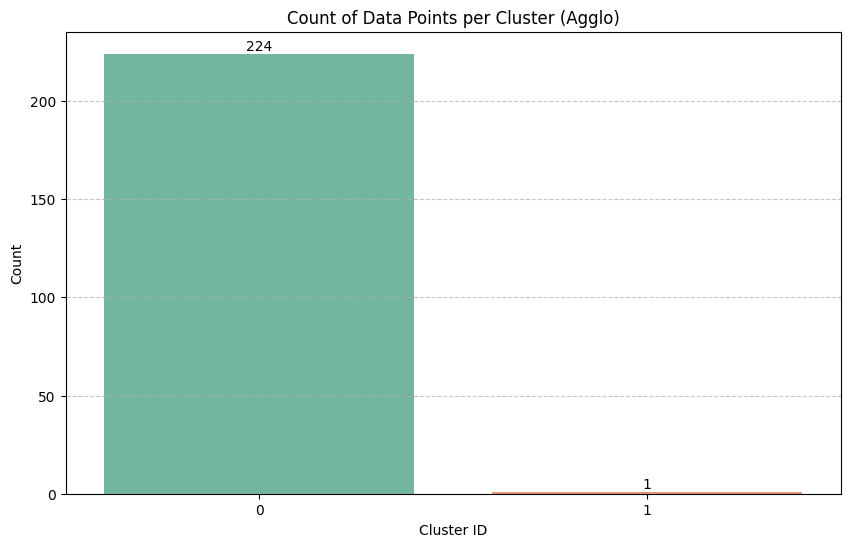

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

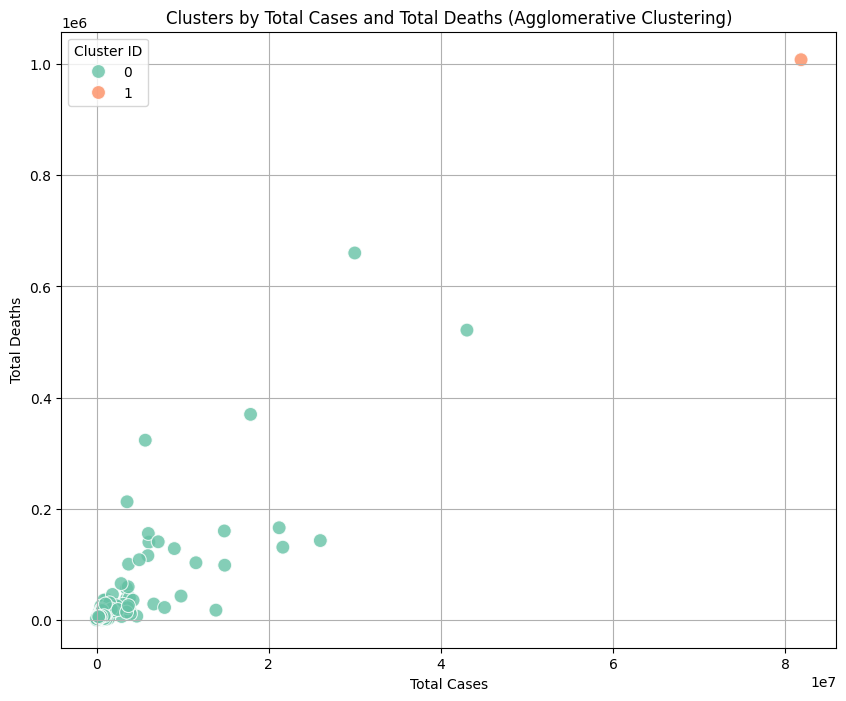

In [352]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Total Cases',
    y='Total Deaths',
    hue='Agglo',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title('Clusters by Total Cases and Total Deaths (Agglomerative Clustering)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Total Cases'
y_col = 'Total Deaths'
z_col = 'Death percentage'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # Color points by cluster
    title='3D Scatter Plot of Countries by Total Cases, Total Deaths, and Death Percentage'
)

fig.show()


In [354]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",  
    color=df["Agglo"].astype(str),          
    hover_name="Country",                    
    hover_data={
        "Total Cases": True,
        "Total Deaths": True,
        "Agglo": True
    },
    title="World Map Cluster Visualization (Agglomerative Clustering)",
    projection="natural earth"
)

fig.show()

# World Map K-Means

In [355]:
import pandas as pd

df_visual = pd.read_csv(
    "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
)
df_visual.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["Total Cases", "Total Deaths"]

scaler = StandardScaler()
scaled = scaler.fit_transform(df_visual[features])

kmeans = KMeans(n_clusters=4, random_state=42)
df_visual["KMeans_Cluster"] = kmeans.fit_predict(scaled)
df_visual["KMeans_Cluster"] = df_visual["KMeans_Cluster"].astype(str)

import plotly.express as px

fig = px.choropleth(
    df_visual,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",
    hover_name="Country",
    hover_data=["Total Cases", "Total Deaths", "KMeans_Cluster"],
    projection="natural earth",
    title="World Map Cluster Visualization (KMeans Clustering)",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()


C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Statistical Summary for each cluster

In [356]:
cluster_summary = df.groupby(y_hc).agg({
    'Country': ['mean', 'std', 'min', 'max'],
    'ISO 3166-1 alpha-3 CODE': ['mean', 'std', 'min', 'max'],
    'Continent': ['mean', 'std', 'min', 'max'],
    'Population': ['mean', 'std', 'min', 'max'],
    'Total Cases': ['mean', 'std', 'min', 'max'],
    'Total Deaths': ['mean', 'std', 'min', 'max'],
    'Tot\xa0Cases//1M pop': ['mean', 'std', 'min', 'max'],
    'Tot\xa0Deaths/1M pop': ['mean', 'std', 'min', 'max'],
    'Death percentage': ['mean', 'std', 'min', 'max']
})

# Rename axis to cluster
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary


Country                          ISO 3166-1 alpha-3 CODE  \
               mean        std    min    max                    mean   
cluster                                                                
0        111.558036  64.902661    0.0  224.0                111.5625   
1        211.000000        NaN  211.0  211.0                210.0000   

                                 Continent            ... Tot Cases//1M pop  \
               std    min    max      mean       std  ...               min   
cluster                                               ...                     
0        64.909496    0.0  224.0  1.741071  1.471679  ...                 9   
1              NaN  210.0  210.0  4.000000       NaN  ...            244734   

                Tot Deaths/1M pop                          Death percentage  \
            max              mean          std   min   max             mean   
cluster                                                                       
0        696044       1088.151786  1191.457909     0  6286         1.445072   
1        244734       3015.000000          NaN  3015  3015         1.231957   

                                        
              std       min        max  
cluster                                 
0        1.745571  0.000000  18.151787  
1             NaN  1.231957   1.231957  

[2 rows x 36 columns]

## Cluster 0 — Mayoritas Negara Dengan Beban Kasus Rendah–Menengah (n ≈ besar)

Profil:

Negara dalam cluster ini memiliki total kasus dan total kematian yang rendah hingga menengah, tetapi penyebarannya sangat beragam (std besar menunjukkan ketimpangan antar-negara).

Rasio kasus/1M dan kematian/1M juga relatif rendah, menunjukkan tingkat paparan pandemi yang lebih moderat.

Death percentage rata-rata sekitar 1.44%, namun dengan variasi tinggi, menunjukkan perbedaan kapasitas sistem kesehatan antar-negara.

Makna:
Cluster ini berisi negara-negara yang tidak mengalami lonjakan ekstrem, kemungkinan karena pengendalian sosial yang memadai, atau populasi lebih kecil sehingga angka absolut tidak terlalu besar.

Strategi Government:

Tingkatkan kapasitas testing & surveillance, karena variasi besar menunjukkan masih ada negara yang belum optimal mendeteksi kasus.

Fokus pada penguatan fasilitas kesehatan dasar untuk menurunkan variasi death percentage.

Implementasi intervensi kesehatan masyarakat (masking, tracing) yang lebih merata antar-negara di cluster ini.

## Cluster 1 — Negara Dengan Beban Pandemi Sangat Tinggi (n=1)

Profil:

Total kasus, total kematian, kasus per 1 juta, dan kematian per 1 juta berada pada angka yang sangat tinggi dengan nilai yang fix (std = 0) karena hanya 1 negara.

Death percentage ≈ 1.23%, sedikit lebih rendah daripada cluster 0, menandakan bahwa meski beban kasus tinggi, negara ini memiliki kapasitas kesehatan yang lebih kuat.

Negara ini adalah outlier, mewakili satu negara dengan eksposur pandemi ekstrem namun respon kesehatan cukup efektif.

Makna:
Negara ini mengalami ledakan kasus besar, namun sistem kesehatan mampu menjaga tingkat kematian agar tetap moderat.

Strategi Government:

Perkuat ambulatory care & early treatment, karena tingginya kasus memerlukan respon cepat.

Lanjutkan protokol mitigasi berbasis data (vaksinasi booster, pembatasan mobilitas lokal).

Berbagi praktik terbaik ke negara di cluster 0 karena negara ini tampaknya memiliki sistem yang relatif mampu menangani gelombang kasus besar.

# K-Means

In [357]:
# create new dataframe that consist only Total Cases and Total Deaths
df = df[['Total Cases', 'Total Deaths']]
df.head()

,Total Cases,Total Deaths
0,177827,7671
1,273870,3492
2,265691,6874
3,40024,153
4,99194,1900


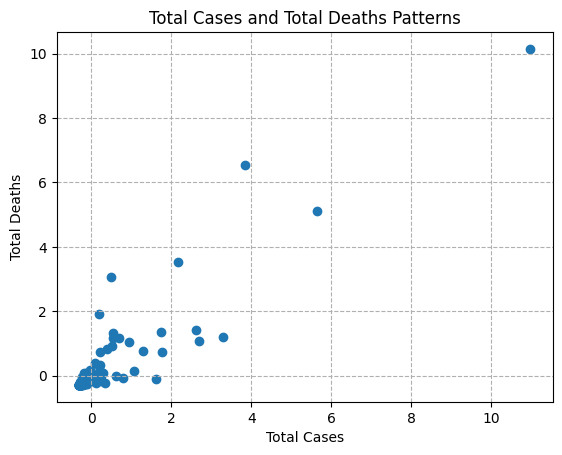

In [358]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Total Cases", "Total Deaths"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Total Cases"], df_sc_scaled["Total Deaths"])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(axis='both', linestyle='--')
plt.title("Total Cases and Total Deaths Patterns")
plt.show()

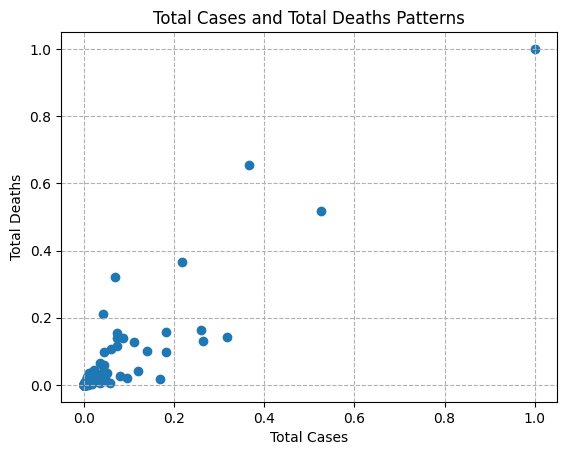

In [359]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Total Cases", "Total Deaths"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Total Cases"], df_minmax_scaled["Total Deaths"])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(axis='both', linestyle='--')
plt.title("Total Cases and Total Deaths Patterns")
plt.show()

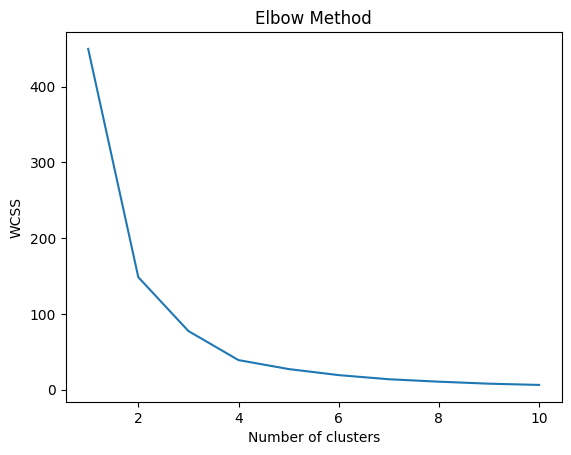

In [360]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [361]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  450.000000
1                   2  148.444562
2                   3   77.300827
3                   4   38.888329
4                   5   27.068042
5                   6   19.060014
6                   7   13.608913
7                   8   10.377477
8                   9    7.735116
9                  10    6.102064


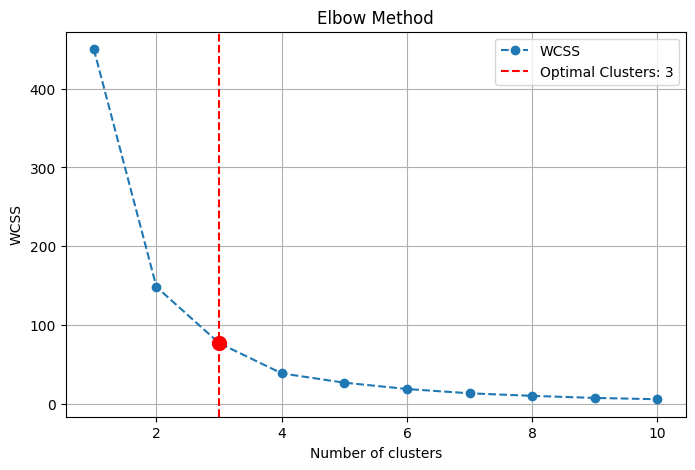

The optimal number of clusters is: 3


In [362]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [363]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Total Cases,Total Deaths,KMeans_Cluster
0,177827,7671,0
1,273870,3492,0
2,265691,6874,0
3,40024,153,0
4,99194,1900,0


C:\Users\miche\AppData\Local\Temp\ipykernel_20260\2336390932.py:4: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



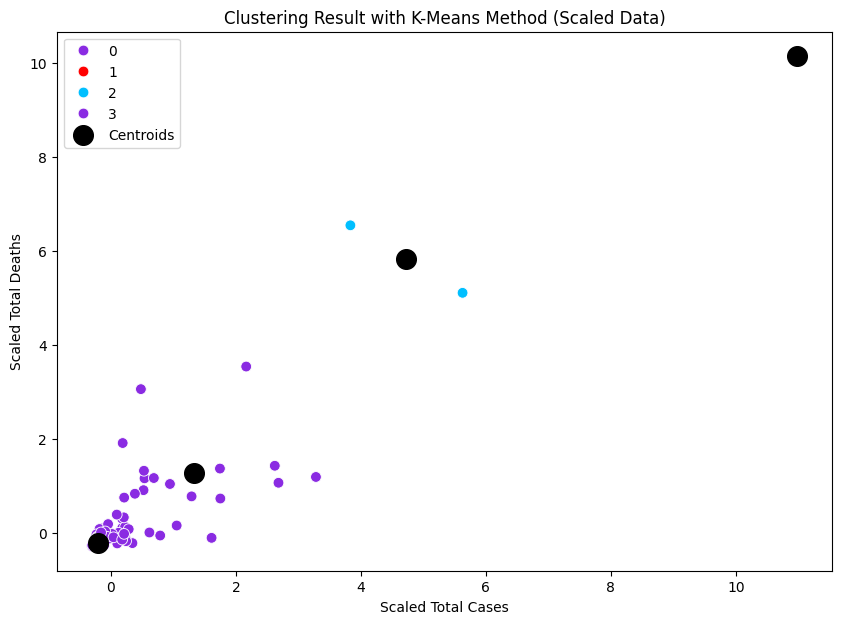

In [364]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Total Cases", y = "Total Deaths", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Total Cases")
plt.ylabel("Scaled Total Deaths")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

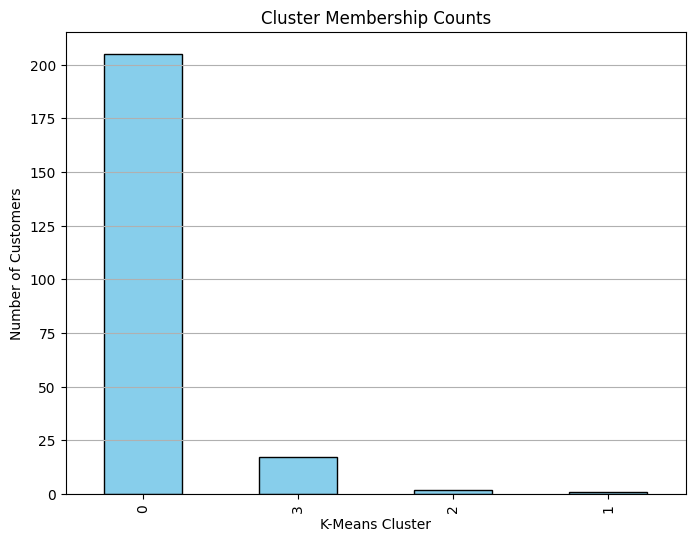

In [365]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_20260\3314906441.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




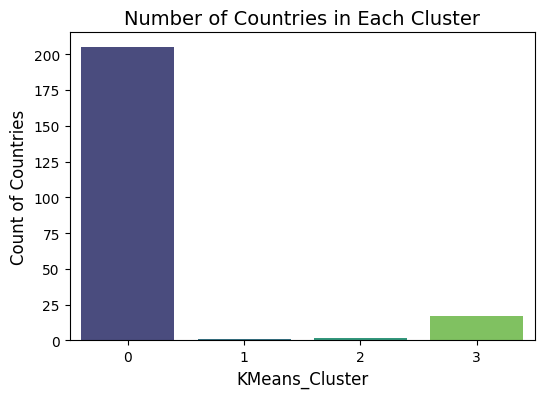

In [366]:
plt.figure(figsize=(6,4))
sns.countplot(x='KMeans_Cluster', data=df, palette='viridis')

plt.title('Number of Countries in Each Cluster', fontsize=14)
plt.xlabel('KMeans_Cluster', fontsize=12)
plt.ylabel('Count of Countries', fontsize=12)
plt.show()

In [367]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(df_sc_scaled, clusters)
print("Silhouette Score:", ss)

Silhouette Score: 0.8536389424351423


# Siilhouette Score Evaluation (K-Means and Agglo)

Hasil evaluasi kualitas clustering menunjukkan bahwa algoritma K-Means memberikan performa segmentasi terbaik dengan silhouette score sebesar 0.85, sedikit lebih tinggi dibandingkan Agglomerative Clustering yang memperoleh 0.83. Nilai silhouette yang tinggi (mendekati 1) menunjukkan bahwa struktur cluster yang terbentuk sangat jelas, dengan jarak antar-cluster yang baik serta kedekatan yang kuat antar anggota dalam cluster yang sama. Dengan demikian, K-Means lebih optimal dalam memisahkan negara berdasarkan pola Total Cases dan Total Deaths, meskipun kedua metode sebenarnya sudah memberikan segmentasi yang sangat baik.

# Cluster Summary of K-Means

In [368]:
# K-Means - Cluster Summary
cluster_summary_scaled = df.groupby('KMeans_Cluster').agg({
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max']
}).rename_axis('KMeans_Cluster')

print("Cluster Summary (Scaled Data)")
print(cluster_summary_scaled)
print("\n")

Cluster Summary (Scaled Data)
                 Total Cases                      Total Deaths           \
                        mean       min       max          mean      min   
KMeans_Cluster                                                            
0               6.658413e+05         1   7908701  7.000454e+03        0   
1               8.183905e+07  81839052  81839052  1.008222e+06  1008222   
2               3.651443e+07  29999816  43029044  5.908285e+05   521388   
3               1.177708e+07   3548559  25997852  1.500504e+05    17235   

                         
                    max  
KMeans_Cluster           
0                100050  
1               1008222  
2                660269  
3                369708  




## Cluster 0 — Kasus Rendah & Kematian Rendah (Mayoritas Negara)

Profil:

Rata-rata kasus total hanya ~665 ribu dengan negara berkisar dari 1 hingga 7,9 juta.

Total kematian masih sangat rendah (mean ~7.000, max 100.050).

Ini adalah cluster dengan dampak pandemi paling ringan.

Makna:
Negara-negara ini memiliki tingkat penyebaran dan fatalitas yang relatif terkendali, kemungkinan karena populasi kecil, respons cepat, atau kapasitas testing rendah.

Strategi Government:

Fokus pada monitoring, deteksi dini, dan penguatan surveilans kesehatan.

Pengadaan fasilitas kesehatan dasar lebih penting daripada intervensi skala besar.

Implementasi kebijakan early containment dan edukasi masyarakat secara preventif.

## Cluster 1 — Negara dengan Dampak Ekstrem (Sangat Tinggi)

Profil:

Hanya satu negara (karena min = max).

Total Cases: 81.8 juta

Total Deaths: 1.008 juta

Ini outlier global dengan angka pandemi paling besar.

Makna:
Negara ini mengalami krisis pandemi dengan penularan luas dan angka kematian yang sangat tinggi, menunjukkan beban sistem kesehatan yang ekstrem.

Strategi Government:

Prioritas pada rehabilitasi sistem kesehatan, recovery ekonomi, dan kesiapan pandemi.

Kebijakan vaksinasi berkelanjutan dan early-warning system wajib diterapkan.

Butuh investasi besar dalam infrastruktur kesehatan, SDM medis, dan sistem data pandemi nasional.

## Cluster 2 — Kasus Tinggi, Kematian Tinggi (Negara Upper Tier)

Profil:

Rata-rata kasus 36 juta, berkisar 30–43 juta.

Total kematian tinggi ~590 ribu, max 660 ribu.

Kondisinya berat, tetapi tidak setinggi cluster 1.

Makna:
Negara-negara ini mengalami pandemi besar tetapi masih dalam kelompok negara maju atau padat penduduk, dengan kemampuan testing tinggi.

Strategi Government:

Fokus pada kesiapan pandemi jangka panjang, termasuk surveilans genomik.

Tingkatkan sistem perawatan ICU dan penanganan komorbid.

Penguatan kampanye kesehatan terkait gaya hidup & vaksinasi.

## Cluster 3 — Kasus Menengah–Tinggi, Kematian Menengah

Profil:

Total kasus rata-rata 11.7 juta (3.5–25.9 juta).

Kematian sekitar 150 ribu (17k–369k).

Dampak cukup berat namun masih jauh di bawah cluster 2.

Makna:
Negara-negara ini mengalami penyebaran signifikan tetapi masih mampu menjaga fatalitas lebih rendah dibanding negara berkasus sangat tinggi.

Strategi Government:

Perkuat keseimbangan antara pembukaan ekonomi dan kesehatan publik.

Alokasikan anggaran untuk program preventif dan telemedicine.

Strategi vaksinasi booster dan edukasi komorbid tetap penting.

# Comparison of Both Models

Both clustering algorithms produced strong performance, as reflected by their high silhouette scores, 0.83, for Agglomerative Clustering and 0.85 for K-Means. However, K-Means outperforms Agglomerative Clustering with a slightly higher silhouette score, indicating better separation between clusters and greater compactness within each cluster.

Additionally, K-Means is generally more effective when clusters tend to be spherical and well-defined, which aligns with the characteristics of your dataset after scaling. In contrast, Agglomerative Clustering is more sensitive to noise and tends to form less distinct boundaries when the data distribution becomes dense.

Therefore, K-Means is selected as the better model because it produces more clearly separated clusters, offers higher internal consistency, and provides a more interpretable segmentation structure based on the pandemic severity indicators.